In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_iris = pd.read_csv('/content/drive/MyDrive/2024_01/Aprendizado de Máquina/iris.csv')


In [ ]:
X = df_iris[['PetalLength[cm]', 'PetalWidth[cm]']].values
y = df_iris['Species'].values


label_dict = {'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2}

df_iris['ClassLabel'] = df_iris['Species'].map(label_dict)

y = df_iris['ClassLabel'].values
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import numpy as np
indices = np.arange(y.shape[0])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [ ]:
rnd = np.random.RandomState(123)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

In [ ]:
X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]
X_train, y_train = X_shuffled[:105], y_shuffled[:105]
X_test, y_test = X_shuffled[105:], y_shuffled[105:]

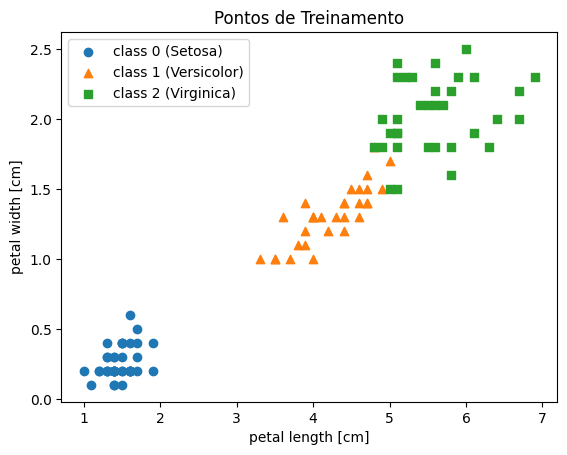

In [ ]:
plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker='o',
            label='class 0 (Setosa)')

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='^',
            label='class 1 (Versicolor)')

plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker='s',
            label='class 2 (Virginica)')

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.title("Pontos de Treinamento")

plt.show()

In [ ]:
class KNN:
  def __init__(self, n_neighbors):
    self.n_neighbors = n_neighbors

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X_test):
    predictions = []
    for x_test in X_test:
      distances = []
      for x_train in self.X:
        distance = ((x_test[0] - x_train[0]) ** 2 + (x_test[1] - x_train[1]) ** 2) ** 0.5
        distances.append(distance)
      sorted_indices = sorted(range(len(distances)), key=distances.__getitem__)
      k_nearest_indices = sorted_indices[:self.n_neighbors]
      k_nearest_labels = [self.y[i] for i in k_nearest_indices]
      prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
      predictions.append(prediction)
    return predictions

knn_model = KNN(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print('Test set accuracy: %.2f%%' % accuracy)

# Criando 5 novos objetos para serem classificados em uma das 3 classes, primeiramente imprimindo os objetos e seus valores depois sua classificação

new_objects = [[4.7, 1.4], [1.2, 2.3], [6.3, 2.9], [5.8, 2.9], [4.1, 2.0]]
print('Novos Objetos:')
for obj in new_objects:
  print(obj)

y_pred = knn_model.predict(new_objects)

print('\nClassificações:')
for i, pred in enumerate(y_pred):
  print('Object {}: Class {}'.format(i+1, pred))


Test set accuracy: 93.33%
Novos Objetos:
[4.7, 1.4]
[1.2, 2.3]
[6.3, 2.9]
[5.8, 2.9]
[4.1, 2.0]

Classificações:
Object 1: Class 1
Object 2: Class 0
Object 3: Class 2
Object 4: Class 2
Object 5: Class 1


In [ ]:

import numpy as np
class KNN_melhorado:
  def __init__(self, n_neighbors):
    self.n_neighbors = n_neighbors

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X_test):
    predictions = []
    for x_test in X_test:
      distances = np.sqrt(((self.X - x_test) ** 2).sum(axis=1))
      sorted_indices = np.argsort(distances)
      k_nearest_indices = sorted_indices[:self.n_neighbors]
      k_nearest_labels = self.y[k_nearest_indices]
      prediction = np.argmax(np.bincount(k_nearest_labels))
      predictions.append(prediction)
    return predictions

knn_model_melhorado = KNN_melhorado(n_neighbors=3)
knn_model_melhorado.fit(X_train, y_train)

y_pred = knn_model_melhorado.predict(X_test)
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print('Test set accuracy: %.2f%%' % accuracy)
# Criando 5 novos objetos para serem classificados em uma das 3 classes, primeiramente imprimindo os objetos e seus valores depois sua classificação

new_objects = [[4.7, 1.4], [1.2, 2.3], [6.3, 2.9], [5.8, 2.9], [4.1, 2.0]]

print('Novos Objetos:')
for obj in new_objects:
  print(obj)

y_pred = knn_model_melhorado.predict(new_objects)

print('\nClassificações:')
for i, pred in enumerate(y_pred):
  print('Object {}: Class {}'.format(i+1, pred))


Test set accuracy: 93.33%
Novos Objetos:
[4.7, 1.4]
[1.2, 2.3]
[6.3, 2.9]
[5.8, 2.9]
[4.1, 2.0]

Classificações:
Object 1: Class 1
Object 2: Class 0
Object 3: Class 2
Object 4: Class 2
Object 5: Class 1


In [ ]:
import time

# Gerando um vetor de teste grande
X_test_large = np.random.rand(100000, 2)

# Medindo o tempo de execução do KNN
start_time = time.time()
y_pred_knn = knn_model.predict(X_test_large)
end_time = time.time()
knn_execution_time = end_time - start_time

# Medindo o tempo de execução do KNN_melhorado
start_time = time.time()
y_pred_knn_melhorado = knn_model_melhorado.predict(X_test_large)
end_time = time.time()
knn_melhorado_execution_time = end_time - start_time

# Comparando os tempos de execução
print("Tempo de execução do KNN:", knn_execution_time)
print("Tempo de execução do KNN_melhorado:", knn_melhorado_execution_time)

# Comparando os vetores de predição
if np.array_equal(y_pred_knn, y_pred_knn_melhorado):
  print("Os vetores de predição são iguais.")
else:
  print("Os vetores de predição são diferentes.")



Tempo de execução do KNN: 16.61157989501953
Tempo de execução do KNN_melhorado: 2.689091682434082
Os vetores de predição são iguais.
